# install pycaret : 모델 비교를 위한 라이브러리 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 데이터 불러오기

In [2]:
import pandas as pd
face_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/face_emotion/madadata/video_result_0512.csv")
KEMdy_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/face_emotion/madadata/KEMdy19_conf.csv')

In [3]:
merge_df = pd.DataFrame(columns = ['file_name','KEM_neutral'	,'KEM_angry',	'KEM_happy',	'KEM_surprise',
                                       'KEM_sad',	'KEM_fear',	'KEM_disgust'])
len(KEMdy_df.loc[KEMdy_df['segment_id']=='0.1']['KEM_neutral'])

# merge_df.loc[0] = [face_ df.loc[0]['file_name'],KEMdy_df.loc[KEMdy_df['segment_id']==face_df.loc[0]['file_name'].replace('.m2ts','')].loc[1]['KEM_neutral']]

0

In [4]:
KEMdy_df

,segment_id,emotion,KEM_neutral,KEM_angry,KEM_happy,KEM_surprise,KEM_sad,KEM_fear,KEM_disgust
0,000-001,happy,0.3126,0.0035,0.6011,0.0182,0.0500,0.0130,0.0016
1,000-002,happy,0.9116,0.0045,0.0147,0.0025,0.0622,0.0013,0.0031
2,000-003,happy,0.8231,0.0061,0.0122,0.0388,0.0302,0.0746,0.0150
3,000-004,happy,0.9102,0.0235,0.0280,0.0162,0.0142,0.0025,0.0054
4,000-005,happy,0.4373,0.0056,0.4612,0.0098,0.0785,0.0057,0.0019
...,...,...,...,...,...,...,...,...,...
10338,099-331,sad,0.8903,0.0860,0.0015,0.0016,0.0061,0.0001,0.0143
10339,099-332,sad,0.9359,0.0320,0.0030,0.0085,0.0161,0.0018,0.0026
10340,099-333,sad,0.9096,0.0046,0.0034,0.0013,0.0795,0.0006,0.0011
10341,099-334,sad,0.2551,0.0054,0.0444,0.0034,0.6818,0.0007,0.0093


In [5]:

#KEMdy_df
merge_df = pd.DataFrame(columns = ['file_name','KEM_neutral'	,'KEM_angry',	'KEM_happy',	'KEM_surprise','KEM_sad',	'KEM_fear',	'KEM_disgust',
                                   'f_neutral','f_angry',	'f_happy',	'f_surprise','f_sad',	'f_fear',	'f_disgust','True'])
a=1
for index,row in face_df[:].iterrows() :
  KEM_data = KEMdy_df.loc[KEMdy_df['segment_id']==face_df.loc[index]['file_name'].replace('.m2ts','')]
  if len(KEM_data) != 0 :
    KEM_neutral = KEM_data['KEM_neutral'].values[0]
    KEM_angry = KEM_data['KEM_angry'].values[0]
    KEM_happy = KEM_data['KEM_happy'].values[0]
    KEM_surprise = KEM_data['KEM_surprise'].values[0]
    KEM_sad = KEM_data['KEM_sad'].values[0]
    KEM_fear = KEM_data['KEM_fear'].values[0]
    KEM_disgust = KEM_data['KEM_disgust'].values[0]
  else :
    KEM_neutral = KEM_angry = KEM_happy =KEM_surprise =KEM_sad=KEM_fear=KEM_disgust = None

  merge_df.loc[index] = [face_df.loc[index]['file_name'].replace('.m2ts',''), KEM_neutral ,KEM_angry , KEM_happy ,KEM_surprise ,KEM_sad,KEM_fear,KEM_disgust,
                        row['neutral'],row['angry'],row['happy'],row['surprise'],row['sad'],row['fear'],row['disgust'],row['True']]
  #print(index,row)
merge_df.sort_values(by = ['file_name'])

,file_name,KEM_neutral,KEM_angry,KEM_happy,KEM_surprise,KEM_sad,KEM_fear,KEM_disgust,f_neutral,f_angry,f_happy,f_surprise,f_sad,f_fear,f_disgust,True
5318,000-001,0.3126,0.0035,0.6011,0.0182,0.05,0.013,0.0016,0.060450,0.133597,0.207881,0.005337,0.379237,0.054655,0.158844,happy
5742,000-002,0.9116,0.0045,0.0147,0.0025,0.0622,0.0013,0.0031,0.105214,0.052628,0.478898,0.073412,0.115407,0.114200,0.060239,happy
5206,000-003,0.8231,0.0061,0.0122,0.0388,0.0302,0.0746,0.015,0.095845,0.221614,0.148556,0.076382,0.239045,0.090719,0.127838,happy
5723,000-004,0.9102,0.0235,0.028,0.0162,0.0142,0.0025,0.0054,0.116061,0.117819,0.171875,0.148187,0.205837,0.159632,0.080590,happy
5887,000-005,0.4373,0.0056,0.4612,0.0098,0.0785,0.0057,0.0019,0.127482,0.177759,0.267284,0.025638,0.239685,0.062684,0.099468,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8830,099-331,0.8903,0.086,0.0015,0.0016,0.0061,0.0001,0.0143,0.006310,0.176201,0.016642,0.028695,0.198235,0.187353,0.386564,sad
7899,099-332,0.9359,0.032,0.003,0.0085,0.0161,0.0018,0.0026,0.005583,0.158206,0.035425,0.016401,0.122366,0.148776,0.513243,sad
8799,099-333,0.9096,0.0046,0.0034,0.0013,0.0795,0.0006,0.0011,0.004061,0.353530,0.013133,0.013076,0.048274,0.082279,0.485648,sad
7819,099-334,0.2551,0.0054,0.0444,0.0034,0.6818,0.0007,0.0093,0.003353,0.019878,0.349972,0.004028,0.372119,0.129019,0.121630,sad


In [6]:
sort_df = merge_df.drop(['file_name'],axis = 1)
print(sort_df.info())
sort_df[sort_df['KEM_neutral'].isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10351 entries, 0 to 10350
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KEM_neutral   10343 non-null  object 
 1   KEM_angry     10343 non-null  object 
 2   KEM_happy     10343 non-null  object 
 3   KEM_surprise  10343 non-null  object 
 4   KEM_sad       10343 non-null  object 
 5   KEM_fear      10343 non-null  object 
 6   KEM_disgust   10343 non-null  object 
 7   f_neutral     10351 non-null  float64
 8   f_angry       10351 non-null  float64
 9   f_happy       10351 non-null  float64
 10  f_surprise    10351 non-null  float64
 11  f_sad         10351 non-null  float64
 12  f_fear        10351 non-null  float64
 13  f_disgust     10351 non-null  float64
 14  True          10351 non-null  object 
dtypes: float64(7), object(8)
memory usage: 1.3+ MB
None


,KEM_neutral,KEM_angry,KEM_happy,KEM_surprise,KEM_sad,KEM_fear,KEM_disgust,f_neutral,f_angry,f_happy,f_surprise,f_sad,f_fear,f_disgust,True
4884,None,None,None,None,None,None,None,0.001933,0.001338,0.957707,0.000178,0.036566,0.001620,0.000659,happy
5044,None,None,None,None,None,None,None,0.000170,0.000604,0.995107,0.000033,0.003588,0.000311,0.000186,happy
7821,None,None,None,None,None,None,None,0.033559,0.053005,0.346973,0.004027,0.156831,0.067884,0.337721,sad
8479,None,None,None,None,None,None,None,0.099215,0.062391,0.091209,0.009357,0.212797,0.142984,0.382047,sad
9205,None,None,None,None,None,None,None,0.031580,0.040058,0.003079,0.218228,0.276251,0.382876,0.047929,surprise
9509,None,None,None,None,None,None,None,0.198498,0.049780,0.063301,0.083879,0.294265,0.272031,0.038246,surprise
9570,None,None,None,None,None,None,None,0.023331,0.021017,0.001754,0.398199,0.194639,0.337023,0.024037,surprise
9908,None,None,None,None,None,None,None,0.090515,0.036564,0.005165,0.496458,0.102250,0.245245,0.023803,surprise


In [7]:
sort_df.dropna(axis = 0,how='any',inplace=True)
sort_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10343 entries, 0 to 10350
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KEM_neutral   10343 non-null  object 
 1   KEM_angry     10343 non-null  object 
 2   KEM_happy     10343 non-null  object 
 3   KEM_surprise  10343 non-null  object 
 4   KEM_sad       10343 non-null  object 
 5   KEM_fear      10343 non-null  object 
 6   KEM_disgust   10343 non-null  object 
 7   f_neutral     10343 non-null  float64
 8   f_angry       10343 non-null  float64
 9   f_happy       10343 non-null  float64
 10  f_surprise    10343 non-null  float64
 11  f_sad         10343 non-null  float64
 12  f_fear        10343 non-null  float64
 13  f_disgust     10343 non-null  float64
 14  True          10343 non-null  object 
dtypes: float64(7), object(8)
memory usage: 1.3+ MB


### 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
df_x_data = sort_df.drop(['True'],axis=1)
df_y_data = sort_df['True']

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x_data, df_y_data, test_size=0.2, random_state=111, stratify=df_y_data)

In [ ]:
trian_data = pd.concat([df_x_train,df_y_train],axis = 1)
test_data = pd.concat([df_x_test,df_y_test],axis = 1)
# trian_data

In [ ]:
import pycaret
from pycaret.classification import *

ModuleNotFoundError: ignored

In [ ]:
df_predict = setup(data = trian_data, target = 'True', train_size=0.8, fold=5)

,Description,Value
0,Session id,6136
1,Target,True
2,Target type,Multiclass
3,Target mapping,"angry: 0, disgust: 1, fear: 2, happy: 3, neutral: 4, sad: 5, surprise: 6"
4,Original data shape,"(8274, 15)"
5,Transformed data shape,"(8274, 15)"
6,Transformed train set shape,"(6619, 15)"
7,Transformed test set shape,"(1655, 15)"
8,Numeric features,7
9,Categorical features,7


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8195,0.9752,0.8195,0.8200,0.8190,0.7894,0.7896,2.2400
xgboost,Extreme Gradient Boosting,0.8102,0.9735,0.8102,0.8112,0.8099,0.7786,0.7789,8.8600
rf,Random Forest Classifier,0.7274,0.9474,0.7274,0.7279,0.7257,0.6820,0.6826,1.4900
et,Extra Trees Classifier,0.7136,0.9411,0.7136,0.7142,0.7109,0.6658,0.6667,1.1400
gbc,Gradient Boosting Classifier,0.7107,0.9413,0.7107,0.7093,0.7085,0.6625,0.6629,15.1380
dt,Decision Tree Classifier,0.6166,0.7764,0.6166,0.6170,0.6162,0.5526,0.5528,0.4040
knn,K Neighbors Classifier,0.5661,0.8380,0.5661,0.5690,0.5648,0.4938,0.4947,0.3840
lr,Logistic Regression,0.5557,0.8595,0.5557,0.5517,0.5475,0.4816,0.4834,0.8280
lda,Linear Discriminant Analysis,0.5313,0.8465,0.5313,0.5358,0.5295,0.4532,0.4546,0.2800
ridge,Ridge Classifier,0.5309,0.0000,0.5309,0.5248,0.5191,0.4526,0.4549,0.1240


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6136, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8323,0.9785,0.8323,0.8330,0.8324,0.8044,0.8045
1,0.8218,0.9749,0.8218,0.8206,0.8206,0.7920,0.7922
2,0.8172,0.9746,0.8172,0.8188,0.8170,0.7868,0.7871
3,0.8127,0.9748,0.8127,0.8124,0.8121,0.7815,0.7816
4,0.8133,0.9733,0.8133,0.8154,0.8132,0.7822,0.7826
Mean,0.8195,0.9752,0.8195,0.8200,0.8190,0.7894,0.7896
Std,0.0072,0.0017,0.0072,0.0071,0.0073,0.0084,0.0083


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

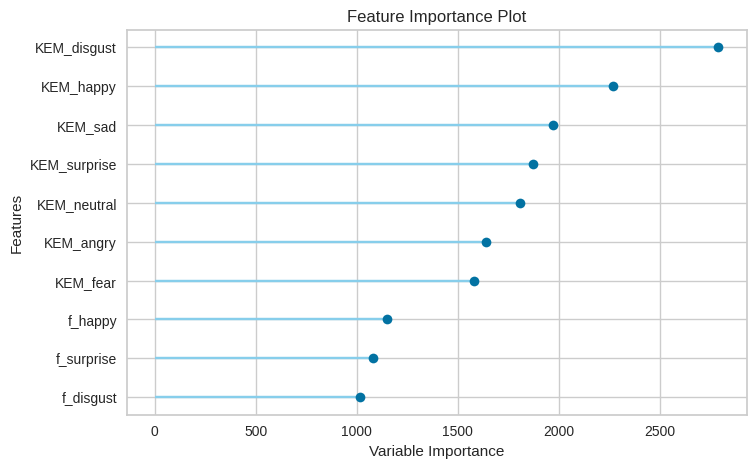

In [ ]:
plot_model(lgbm, plot = 'feature')

# Best Model 생성

In [ ]:
sort_df

,KEM_neutral,KEM_angry,KEM_happy,KEM_surprise,KEM_sad,KEM_fear,KEM_disgust,f_neutral,f_angry,f_happy,f_surprise,f_sad,f_fear,f_disgust,True
0,0.7558,0.1426,0.0126,0.0159,0.0682,0.0008,0.0041,0.042263,0.040336,0.002873,0.827911,0.010901,0.066445,0.009272,angry
1,0.1497,0.1969,0.0032,0.0251,0.6144,0.0026,0.008,0.276706,0.155160,0.130282,0.147228,0.016157,0.092051,0.182416,angry
2,0.0397,0.0317,0.0002,0.0009,0.9234,0.0005,0.0036,0.052848,0.105551,0.066056,0.575068,0.072648,0.097546,0.030282,angry
3,0.4309,0.4867,0.0013,0.0071,0.0021,0.0009,0.071,0.069242,0.041793,0.052664,0.543053,0.089280,0.180461,0.023507,angry
4,0.0261,0.5144,0.0037,0.3562,0.0005,0.0753,0.0238,0.020228,0.232062,0.087097,0.084714,0.123117,0.142928,0.309855,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,0.4997,0.0408,0.0798,0.344,0.013,0.0208,0.0018,0.006277,0.088713,0.001473,0.842782,0.008513,0.042501,0.009740,surprise
10347,0.6042,0.3394,0.0003,0.0223,0.0044,0.0075,0.0219,0.066922,0.018652,0.000935,0.638820,0.098965,0.165999,0.009708,surprise
10348,0.1473,0.031,0.0103,0.0062,0.8029,0.0007,0.0016,0.012216,0.022925,0.001467,0.735503,0.038967,0.142067,0.046854,surprise
10349,0.0969,0.0322,0.0089,0.0072,0.8528,0.0008,0.0012,0.007534,0.019550,0.000895,0.898282,0.009734,0.044949,0.019056,surprise


In [8]:
import numpy as np
def make_xdata (data):
    x_data=[]
    for revec in data:
        x_data.append(revec[:-1])

    return np.array(x_data)

def make_y_label (data):
    y_2la=[]

    for revec in data:
        y_2la.append(revec[-1])

    return np.array(y_2la)

'''X variables'''
all_input=make_xdata(sort_df.values.tolist())

'''Y variable'''
all_y=make_y_label(sort_df.values.tolist())


# 0번째 데이터
print(all_input[0])
print(all_y[0])

[7.55800000e-01 1.42600000e-01 1.26000000e-02 1.59000000e-02
 6.82000000e-02 8.00000000e-04 4.10000000e-03 4.22627074e-02
 4.03358288e-02 2.87292647e-03 8.27910566e-01 1.09007486e-02
 6.64450745e-02 9.27212988e-03]
angry


In [9]:
# K fold cross validation: K=5
from sklearn.model_selection import KFold
import numpy as np

def K_fold_data (data, k):

    kf=KFold(n_splits=k, random_state=7, shuffle=True)
    K_train_data=[]
    K_validation_data=[]

    for train_index, validation_index in kf.split(data):
        fold_train_set, fold_validation_set = data[train_index], data[validation_index]
        K_train_data.append(fold_train_set)
        K_validation_data.append(fold_validation_set)

    return np.array(K_train_data), np.array(K_validation_data)

'''X 데이터의 train/test split'''
all_x_train,all_x_test=K_fold_data(all_input,5)

'''Y 데이터의 train/test split'''
all_y_train,all_y_test=K_fold_data(all_y,5)


print(len(all_x_train),len(all_x_train[0]),len(all_x_test[0]))
print(len(all_y_train[0]),len(all_y_test[0]))


5 8274 2069
8274 2069


<ipython-input-9-b9e020513437>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(K_train_data), np.array(K_validation_data)


In [10]:
all_x_train[0].shape

(8274, 14)

In [11]:
# 선형 모델인 Logit 예측 모델

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

def logitRegression(x_train,x_test,y_train,y_test):
    acc_train=[]
    acc_test=[]
    models=[]

    for i in range(len(x_train)):
        logit=LogisticRegression()
        logit=logit.fit(x_train[i],y_train[i])

        models.append(logit)

        y_pre_train=logit.predict(x_train[i])
        y_pre_test=logit.predict(x_test[i])

        acc_train.append(accuracy_score(y_train[i],y_pre_train)*100)
        acc_test.append(accuracy_score(y_test[i],y_pre_test)*100)

    return models,acc_train,acc_test

log_models,log_acc_train,log_acc_test=logitRegression(all_x_train,all_x_test,all_y_train,all_y_test)

print(log_models)
print(log_acc_train)
print(log_acc_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
[56.12762871646121, 55.946337926033365, 55.80130529369109, 55.91540785498489, 55.81873111782477]
[54.374093765103915, 55.87240212663123, 56.69405509908169, 56.237911025145074, 55.4642166344294]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# 예측 모델 성능 결과
from scipy.stats import sem

print("acc: ", np.mean(log_acc_train),sem(log_acc_train),np.mean(log_acc_test),sem(log_acc_test))

acc:  55.92188218179906 0.05837403738138422 55.728535730078264 0.3947636003996895


In [13]:
# 비선형 모델인 lightGBM 예측 모델

from lightgbm import LGBMClassifier
import joblib
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

def LGBM(x_train,x_test,y_train,y_test):
    acc_train=[]
    acc_test=[]
    models=[]

    for i in range(len(x_train)):

        lgbm = LGBMClassifier(objective=None)
        lgbm = lgbm.fit(x_train[i],y_train[i])

        models.append(lgbm)

        y_pre_train=lgbm.predict(x_train[i])
        y_pre_test=lgbm.predict(x_test[i])

        acc_train.append(accuracy_score(y_train[i],y_pre_train)*100)
        acc_test.append(accuracy_score(y_test[i],y_pre_test)*100)

    return models,acc_train,acc_test

lgbm_models,lgbm_acc_train,lgbm_acc_test=LGBM(all_x_train,all_x_test,all_y_train,all_y_test)

print(lgbm_models)
print(lgbm_acc_train)
print(lgbm_acc_test)

[LGBMClassifier(), LGBMClassifier(), LGBMClassifier(), LGBMClassifier(), LGBMClassifier()]
[99.9879139473048, 100.0, 99.97582789460962, 100.0, 100.0]
[85.79023682938617, 85.59690671822136, 86.51522474625423, 85.58994197292068, 86.21856866537718]


In [14]:
# print('fold : 5')
# print('acc_train : '+ str(rf_acc_train))
# print('acc_test : '+ str(rf_acc_test))

In [15]:
# 예측 모델 성능 결과
from scipy.stats import sem

print("acc: ", np.mean(lgbm_acc_train),sem(lgbm_acc_train),np.mean(lgbm_acc_test),sem(lgbm_acc_test))

acc:  99.99274836838289 0.004834421078075834 85.94217578643192 0.18318610337534977


In [16]:
# rf_preds = model.predict(df_x_test.drop(['file_name'],axis = 1))
# result = pd.concat([df_x_test['file_name'].reset_index(level=None,drop=True),pd.DataFrame(rf_preds,columns = ['Pred']),df_y_test.reset_index(level=None,drop=True)],axis =1)
# result

In [17]:
lgbm_pred = lgbm_models[2].predict(all_x_test[2])
lgbm_pred  = pd.DataFrame(lgbm_pred)
lgbm_True = pd.DataFrame(all_y_test[2])
result =  pd.concat([lgbm_pred,lgbm_True],axis = 1)
result.columns = ['Pred','True']
result

,Pred,True
0,angry,angry
1,angry,angry
2,angry,angry
3,angry,angry
4,angry,angry
...,...,...
2064,surprise,surprise
2065,surprise,surprise
2066,surprise,surprise
2067,angry,surprise


정확도 : 0.8651522474625423


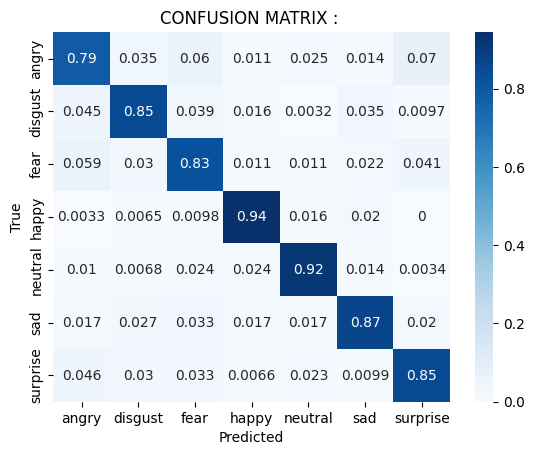

In [18]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("정확도 : " + str(accuracy_score(result['True'], result['Pred'])))

LABELS = ['angry','disgust','fear','happy','neutral','sad','surprise']

cm = confusion_matrix(result['True'], result['Pred'], normalize='true')
sns.heatmap(cm,xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap='Blues')
plt.title("CONFUSION MATRIX : ")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 모델 저장

In [ ]:
# import joblib

# joblib.dump(lgbm_models[2],'/content/drive/MyDrive/Colab Notebooks/face_emotion/conf_lgbm_model.pkl')

In [19]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/face_emotion/madadata/real_test/alldata_result.csv")
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [24]:
df

,NAME,TRUE,KEM_neutral,KEM_angry,KEM_happy,KEM_surprise,KEM_sad,KEM_fear,KEM_disgust,f_neutral,f_angry,f_happy,f_surprise,f_sad,f_fear,f_disgust
0,01-01,neutral,0.6009,0.1864,0.0346,0.0533,0.0371,0.0355,0.0521,0.103056,0.273143,0.338217,0.047524,0.065244,0.119484,0.053332
1,01-02,fear,0.9578,0.0065,0.0064,0.0062,0.0068,0.0070,0.0093,0.061536,0.460854,0.035228,0.006906,0.297835,0.054820,0.082820
2,01-03,angry,0.6502,0.0987,0.0269,0.0905,0.0472,0.0357,0.0509,0.090925,0.288134,0.058718,0.112127,0.229134,0.138514,0.082449
3,01-04,disgust,0.7296,0.0872,0.0249,0.0611,0.0236,0.0226,0.0509,0.043028,0.520127,0.053770,0.019129,0.178994,0.057794,0.127159
4,01-05,surprise,0.2008,0.2763,0.0387,0.2747,0.0493,0.0507,0.1095,0.016153,0.087913,0.721875,0.051619,0.022444,0.069653,0.030342
5,01-06,sad,0.0175,0.9325,0.0093,0.0100,0.0094,0.0084,0.0129,0.018400,0.191736,0.081653,0.097456,0.351958,0.197357,0.061438
6,01-07,neutral,0.8697,0.0173,0.0426,0.0139,0.0168,0.0165,0.0231,0.050692,0.435753,0.047844,0.019466,0.298288,0.073082,0.074876
7,01-08,fear,0.2443,0.0348,0.5532,0.0502,0.0415,0.0360,0.0399,0.069607,0.116152,0.033086,0.287334,0.238207,0.199104,0.056511
8,01-09,sad,0.0337,0.0111,0.9052,0.0128,0.0120,0.0135,0.0117,0.048432,0.236729,0.067062,0.024470,0.413197,0.157637,0.052474
9,02-01,happy,0.9128,0.0150,0.0181,0.0141,0.0156,0.0128,0.0114,0.021572,0.062682,0.784350,0.003584,0.089587,0.019049,0.019176


In [ ]:
# lgbm = LGBMClassifier(objective=None)
# lgbm = lgbm.fit(all_x_train[3],all_y_train[3])

In [ ]:
# all_x_train[3]

In [ ]:
# lgbm.predict(x)

In [21]:
lgbm_pred = lgbm_models[2].predict(x)
lgbm_pred  = pd.DataFrame(lgbm_pred)
lgbm_True = pd.DataFrame(all_y_test[2])
result =   pd.concat([df.iloc[:,0],lgbm_pred,y],axis = 1)
result.columns = ['file_name','Pred','True']
result

,file_name,Pred,True
0,01-01,fear,neutral
1,01-02,surprise,fear
2,01-03,fear,angry
3,01-04,disgust,disgust
4,01-05,happy,surprise
5,01-06,fear,sad
6,01-07,angry,neutral
7,01-08,disgust,fear
8,01-09,fear,sad
9,02-01,happy,happy


In [22]:
accuracy_score(y,lgbm_models[2].predict(x))*100

32.142857142857146

In [23]:
result.to_csv('/content/drive/MyDrive/Colab Notebooks/face_emotion/madadata/result_testdata.csv')

# Shap 방법론 해석

In [ ]:
import shap
import numpy
shap.initjs()

#Shap 기반 설명 matrix 생성
explainer1 = shap.TreeExplainer(lgbm_models[0])
shap_values1 = explainer1.shap_values(all_x_train[0])

explainer2 = shap.TreeExplainer(lgbm_models[1])
shap_values2 = explainer2.shap_values(all_x_train[1])

explainer3 = shap.TreeExplainer(lgbm_models[2])
shap_values3 = explainer3.shap_values(all_x_train[2])

explainer4 = shap.TreeExplainer(lgbm_models[3])
shap_values4 = explainer4.shap_values(all_x_train[3])

explainer5 = shap.TreeExplainer(lgbm_models[4])
shap_values5 = explainer5.shap_values(all_x_train[4])

In [ ]:
len(list(numpy.abs(shap_values1[0]).mean(0)))

14

In [ ]:
save_shap_value = pd.DataFrame(columns=['model']+list(sort_df.columns)[:-1])

save_shap_value = save_shap_value.append(pd.Series(['1']+list(numpy.abs(shap_values1[0]).mean(0)), index= save_shap_value.columns), ignore_index=True)
save_shap_value = save_shap_value.append(pd.Series(['2']+list(numpy.abs(shap_values2[0]).mean(0)), index= save_shap_value.columns), ignore_index=True)
save_shap_value = save_shap_value.append(pd.Series(['3']+list(numpy.abs(shap_values3[0]).mean(0)), index= save_shap_value.columns), ignore_index=True)
save_shap_value = save_shap_value.append(pd.Series(['4']+list(numpy.abs(shap_values4[0]).mean(0)), index= save_shap_value.columns), ignore_index=True)
save_shap_value = save_shap_value.append(pd.Series(['5']+list(numpy.abs(shap_values5[0]).mean(0)), index= save_shap_value.columns), ignore_index=True)

save_shap_value.insert(1,'ACC',lgbm_acc_test)
save_shap_value

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,model,ACC,KEM_neutral,KEM_angry,KEM_happy,KEM_surprise,KEM_sad,KEM_fear,KEM_disgust,f_neutral,f_angry,f_happy,f_surprise,f_sad,f_fear,f_disgust
0,1,85.790237,0.311060,0.863483,0.438040,0.141840,0.458982,0.236554,0.474529,0.084118,0.384463,0.273415,0.073387,0.051574,0.120803,0.129473
1,2,85.596907,0.311795,0.880307,0.441116,0.168638,0.421112,0.184758,0.456511,0.088534,0.394663,0.290656,0.067167,0.061037,0.131749,0.171041
2,3,86.515225,0.376224,0.888448,0.438151,0.159133,0.433830,0.188520,0.439647,0.083627,0.414363,0.230887,0.054036,0.057517,0.148932,0.136698
3,4,85.589942,0.298555,0.970227,0.459183,0.128328,0.437022,0.206450,0.449687,0.076482,0.391985,0.272549,0.070159,0.068119,0.112447,0.111205
4,5,86.218569,0.307065,0.988798,0.497361,0.132120,0.435101,0.163693,0.436395,0.072314,0.396695,0.233303,0.123595,0.069153,0.137513,0.151204


In [ ]:
save_shap_value.to_csv('(balanced)shap_value.csv', index = None)

In [ ]:
all_x_train_1
print(len(all_x_train_1))
print(len(shap_values1))

8274
7


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


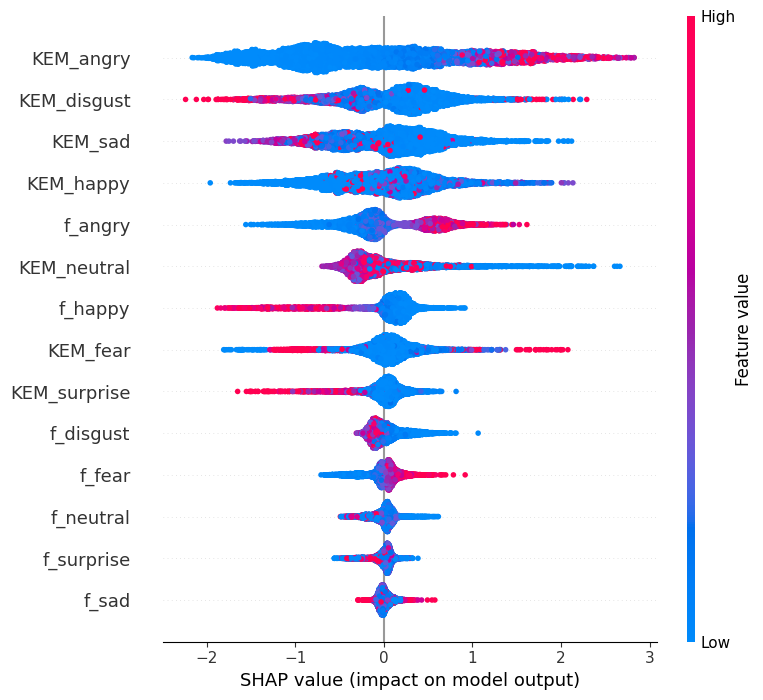

In [ ]:
all_x_train_1 = pd.DataFrame(all_x_train[0],columns = list(sort_df.columns)[:-1])

shap.summary_plot(shap_values1[0],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")

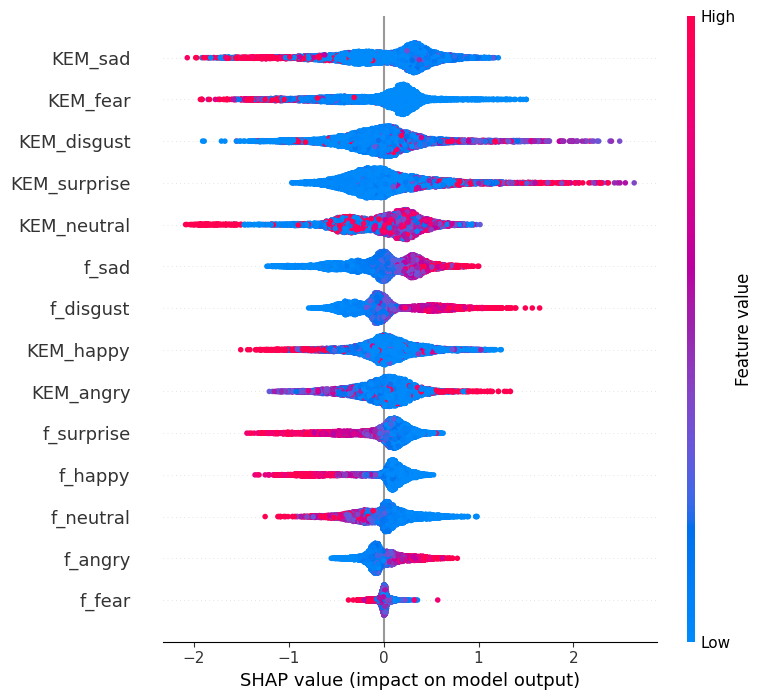

In [ ]:
shap.summary_plot(shap_values1[1],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")

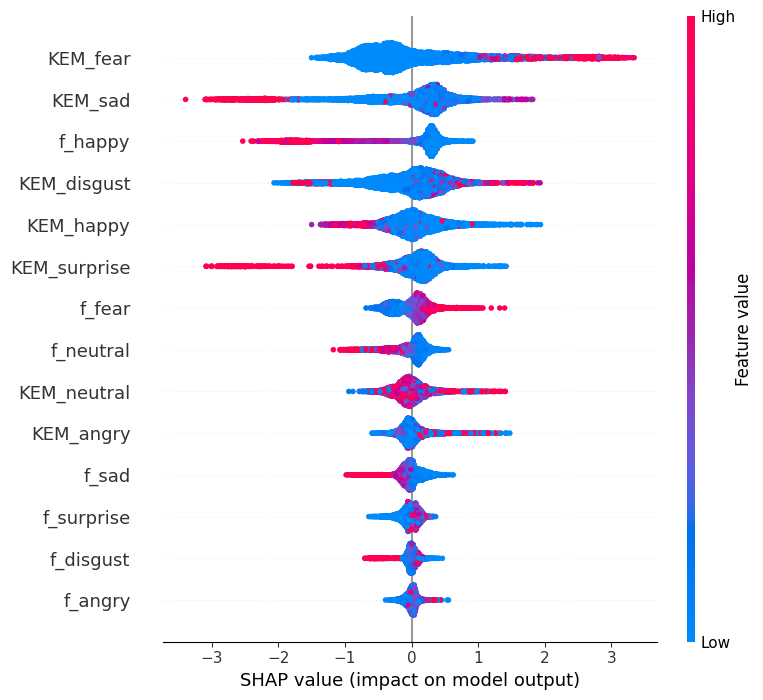

In [ ]:
shap.summary_plot(shap_values1[2],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")

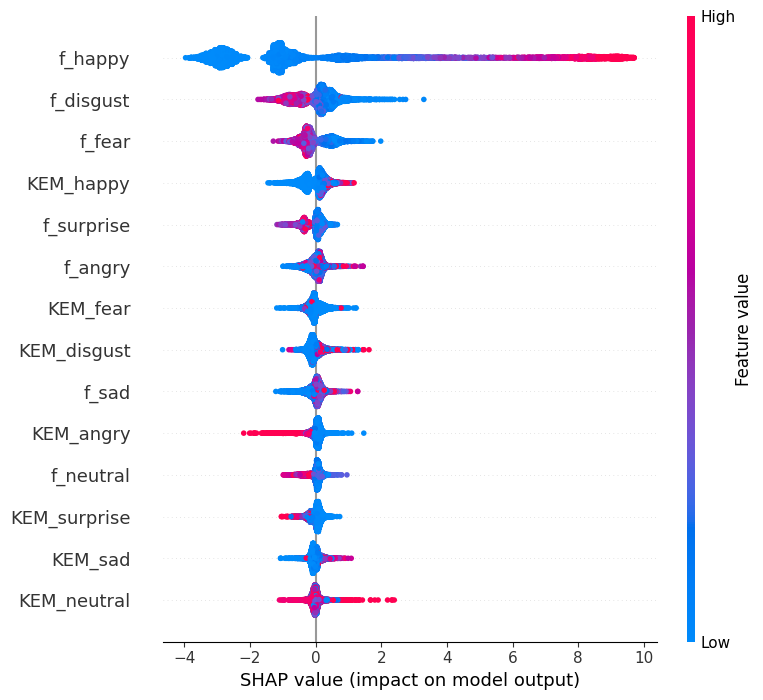

In [ ]:
shap.summary_plot(shap_values1[3],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")

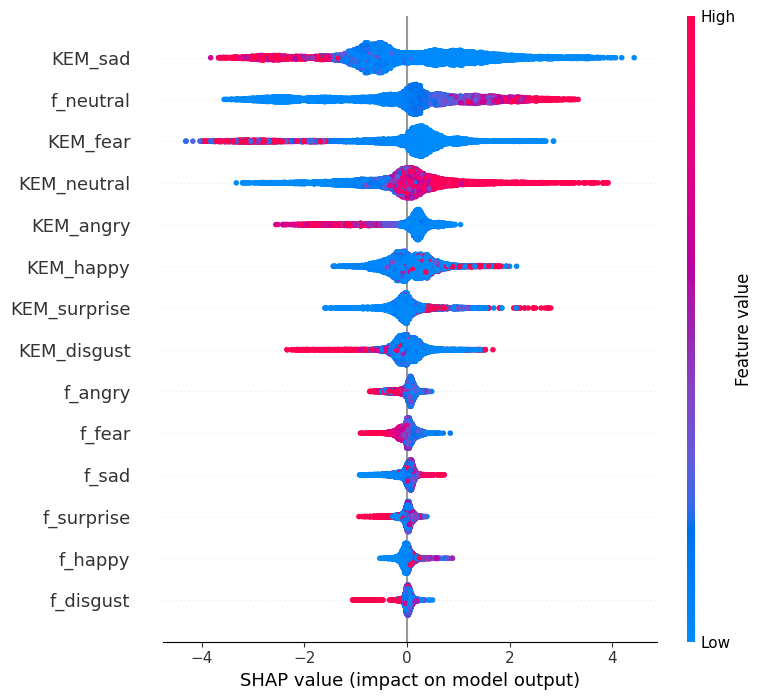

In [ ]:
shap.summary_plot(shap_values1[4],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")

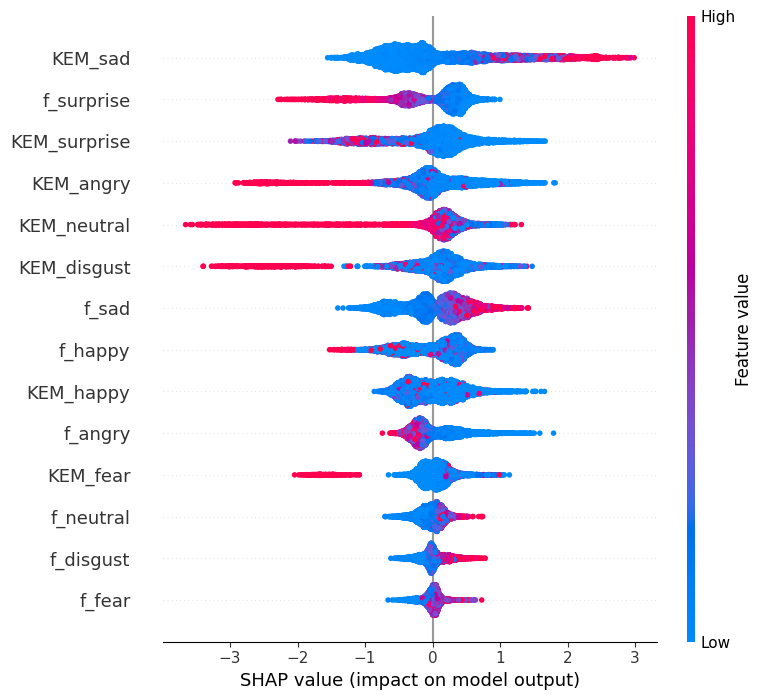

In [ ]:
shap.summary_plot(shap_values1[5],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")

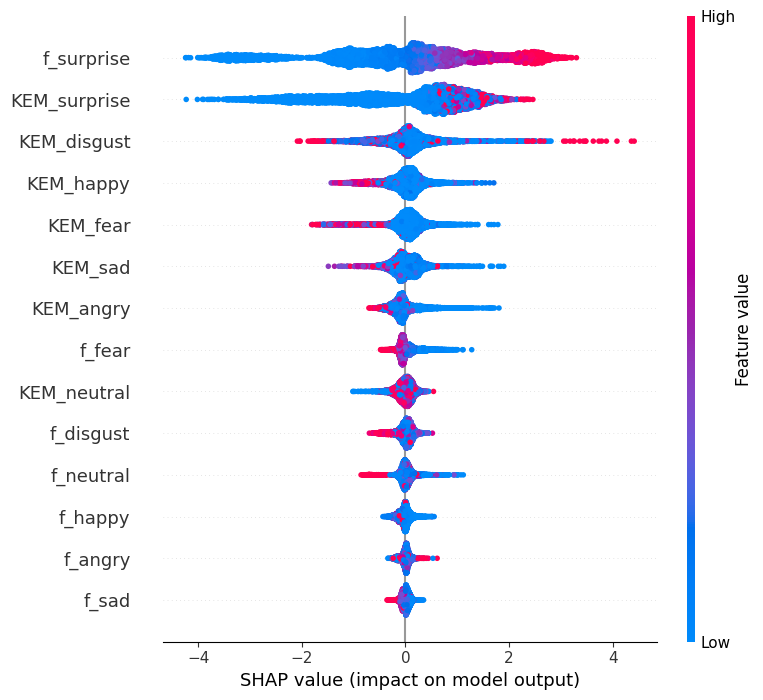

In [ ]:
shap.summary_plot(shap_values1[6],all_x_train_1, feature_names = all_x_train_1.columns, plot_type = "dot")